In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We've already done some simple plotting in class, using the 'plot' function:

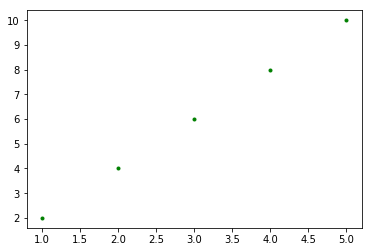

In [4]:
x = [1,2,3,4,5]
y = [2,4,6,8,10]

plt.plot(x, y, 'g.')
plt.show()

This function allows us to pass in any number of x and y arrays, followed by format strings to determine the line type.

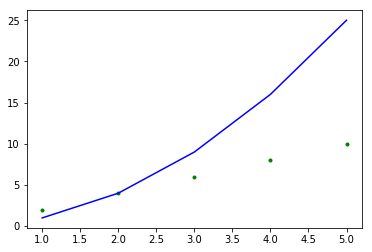

In [5]:
y2 = [1,4,9,16,25]

plt.plot(x, y, 'g.', x, y2, 'b-')
plt.show()

Other common useful functions include setting axes labels, axes ranges, and plot title:

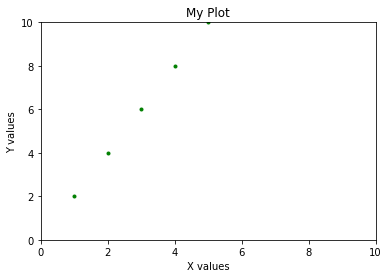

In [17]:
plt.plot(x, y, 'g.')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.axis([0, 10, 0, 10]) # [xmin, xmax, ymin, ymax]
plt.title("My Plot")
plt.show()

Of course, you can also pass in pandas Series and numpy arrays instead of regular python lists (in fact, if you pass in a regular list, it converts it to a numpy array internally):

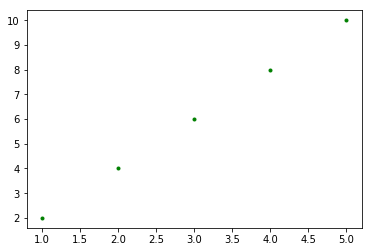

In [11]:
npx = np.array(x)
npy = np.array(y)
plt.plot(npx, npy, 'g.')
plt.show()

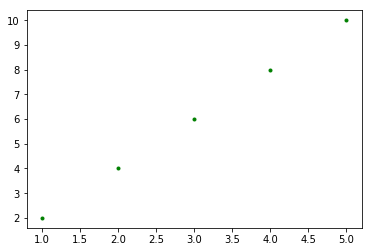

In [15]:
pdx = pd.Series(x)
pdy = pd.Series(y)
plt.plot(pdx, pdy, 'g.')
plt.show()

For our purposes, we work a lot with pandas dataframes. It would be great if matplotlib supported plotting two numerical columns in a dataframe without going through too much hassle... oh wait, it does.

In [26]:
# let's get a familiar dataset
from sklearn import datasets
dataset = datasets.load_boston()
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['MEDV'] = pd.Series(dataset['target'], name='MEDV')

What if we want to plot the RM column data vs. the target MEDV values? You could get each column individually like this:

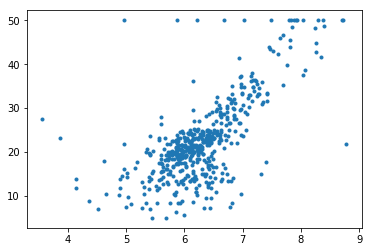

In [30]:
plt.plot(df['RM'], df['MEDV'], '.')
plt.show()

But pyplot supports passing in a dataframe directly into the 'data' keyword argument, and you only need to name which columns you want:

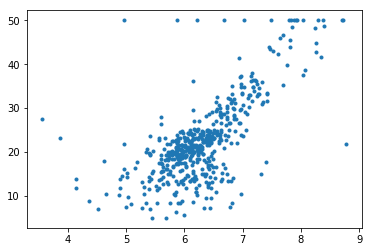

In [32]:
plt.plot('RM', 'MEDV', '.', data=df)
plt.show()

That's fine and all for numerical data, but what about categorical data? Let's take our project 1 dataset for example:

In [35]:
df2 = pd.read_csv('lectures/data/Train.csv')

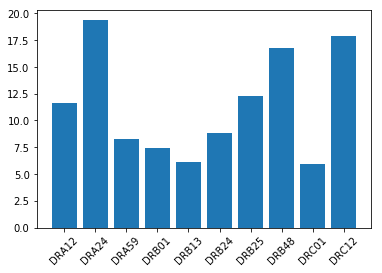

In [52]:
# create the pivot table that holds average weight per item
item_avg_weight = df2.pivot_table(index='Item_Identifier', values='Item_Weight')
# one small hiccup: the 'Item_Identifier' column isn't actually a 'column'
# in the pivot table, it is the index.
# So we can't use the column labels to plot them
# instead, pass them in individually
# also, there's ~1500 unique items, let's only plot the first 10
first10 = item_avg_weight.iloc[:10]
plt.bar(first10.index, first10['Item_Weight'])
plt.xticks(rotation=45) # nice convenience to not clutter the x axis labels
plt.show()

In [44]:
item_avg_weight.index

Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1555)

Now, let's look at some of the more advanced stuff we will do.
First, subplots:

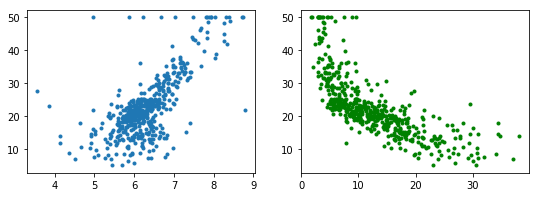

In [54]:
plt.figure(1, figsize=(9,3))
plt.subplot(1,2,1)
plt.plot('RM', 'MEDV', '.', data=df)
plt.subplot(1,2,2)
plt.plot('LSTAT', 'MEDV', 'g.', data=df)
plt.show()

Second (this one's fun), heatmaps:

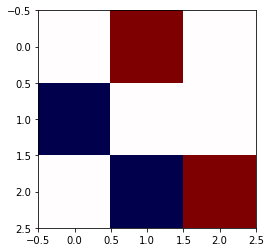

In [59]:
img = np.array([
    [1,2,1],
    [0,1,1],
    [1,0,2]
])
plt.imshow(img, cmap="seismic")
plt.show()

You can use this, for example, in conjunction with pandas correlation tables:

In [61]:
corr = df.corr()

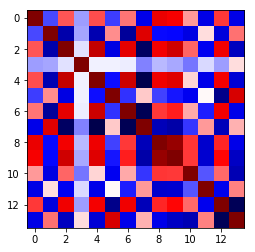

In [62]:
plt.imshow(corr, cmap="seismic")
plt.show()